## Week 6 Practitioner Machine Learning 
### Thoriq AS


<a id = "2"></a><br>
## Import Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
                           

<a id = "3"></a><br>
## Load Dataset

In [ ]:
!pip install -q kaggle
from google.colab import files

# Upload Token API Kaggle
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shwetabh123/mall-customers --unzip

In [49]:
data = pd.read_csv('Mall_Customers.csv', index_col=0)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [50]:
data.drop(['Genre'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [51]:
data.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
dups = data.duplicated()
print("Sum duplicate data",data.duplicated().sum())
data[dups]

Sum duplicate data 4


,Annual Income (k$),Spending Score (1-100)
CustomerID,,
50,40,42
69,48,59
132,71,75
159,78,1


In [53]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


<a id = "4"></a><br>
## 1 - K-Means 

In [54]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(n_clusters=2)

### Labels

In [55]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [56]:
np.unique(k_means.labels_)

array([0, 1], dtype=int32)

In [57]:
centers = k_means.cluster_centers_

centers

array([[41.98181818, 49.87272727],
       [84.38372093, 50.89534884]])

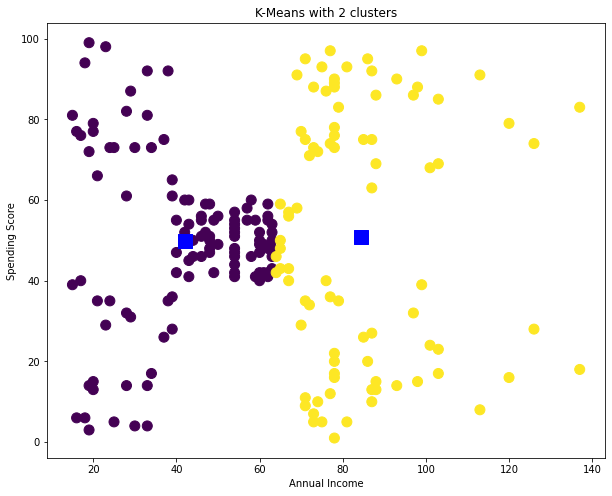

In [58]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

* A measure of how similar a point is to other points in its own cluster and how different it is from points in other clusters.

In [59]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data, k_means.labels_)

print("Score = ", score)

Score =  0.3268547529332457


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

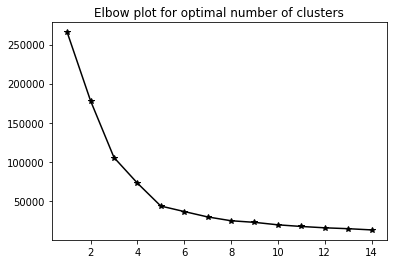

In [60]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

### KMeans clustering with 5 clusters

In [61]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(n_clusters=5)

In [62]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [63]:
centers = k_means.cluster_centers_

centers

array([[55.58227848, 49.49367089],
       [26.30434783, 20.91304348],
       [88.5       , 17.58823529],
       [86.94736842, 82.31578947],
       [25.72727273, 79.36363636]])

### Displaying Data in 5 cluster form 
with 5 centroids

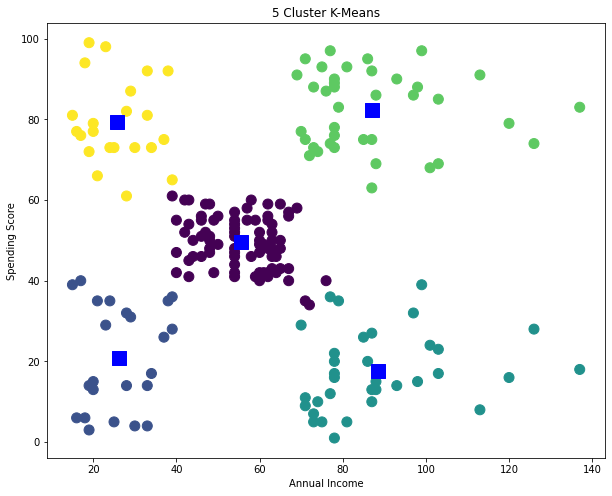

In [64]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

Silhouette Score: This is a better measure to decide the number of clusters to be formulated from the data. 

In [65]:
score = metrics.silhouette_score(data, k_means.labels_)

print("Score = ", score)

Score =  0.5564284222254647


This function returns the Silhouette Coefficient for each sample.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

In [66]:
score1 = metrics.silhouette_samples(data, k_means.labels_, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.42058156  0.69764828  0.64098168  0.69787503  0.39625792  0.69955425
  0.65008973  0.66077915  0.6311537   0.66526376  0.67903198  0.62458628
  0.68120773  0.72040309  0.6818028   0.72696211  0.48892105  0.54782283
  0.5830248   0.63268171  0.46964565  0.67913461  0.64255371  0.67344569
  0.66236238  0.70607939  0.49271166  0.30642444  0.49896171  0.68581694
  0.60711902  0.6145521   0.57774789  0.61879893  0.61032609  0.64079498
  0.58711256  0.53145543  0.4237897   0.4861926   0.10050917  0.5469578
 -0.0010924   0.1094514   0.31441421  0.05743346  0.38232409  0.42665168
  0.28284192  0.51569284  0.29529878  0.51105117  0.33553589  0.48476093
  0.36730182  0.59514223  0.53720876  0.63641009  0.59109983  0.55427788
  0.57609672  0.64715773  0.49954798  0.67679557  0.52441048  0.68241494
  0.6643781   0.65155809  0.64063336  0.57332704  0.70656066  0.63859256
  0.73430186  0.72092231  0.73313434  0.74297781  0.74290677  0.65685476
  0.75032463  0.7061781   0.63483614  0.694

<a id = "5"></a><br>
## 2 - Affinity Propagation
Affinity Propagation involves finding a set of exemplars that best summarize the data.

In [67]:
model_aff = AffinityPropagation(damping=0.9)
model_aff.fit(data)
#
yhat_aff = model_aff.predict(data)
clusters_aff = unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [ 0  1  2  3  4  5  6  7  8  9 10]


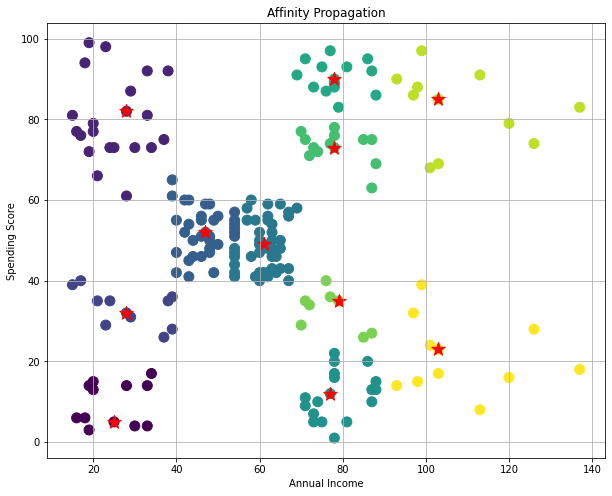

In [68]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_aff, s=100)

plt.scatter(centroids_aff[:,0], centroids_aff[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Affinity Propagation')
plt.grid()
plt.show()

In [69]:
score_aff = metrics.silhouette_score(data,labels_aff)

print("Score of Affinity Propagation = ", score_aff)

Score of Affinity Propagation =  0.44261870608551


<a id = "6"></a><br>
## 3 - BIRCH
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

In [70]:
model_br = Birch(threshold=0.01, n_clusters=5)
model_br.fit(data)
#
yhat_br = model_br.predict(data)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_

Clusters of Birch [0 1 2 3 4]


In [71]:
score_br = metrics.silhouette_score(data,labels_br)

print("Score of Birch = ", score_br)

Score of Birch =  0.5555440617229916


<a id = "7"></a><br>
## 4- DBSCAN

 * DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.
 * For this data, could not get a good result.

In [72]:
# dbscan clustering
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values

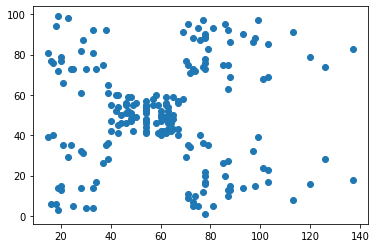

In [73]:
# define the model
model = DBSCAN(eps=0.7, min_samples=90)
# fit model and predict clusters
yhat = model.fit_predict(data_X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

<a id = "8"></a><br>
## 5 - Mini Batch K-Means

* Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

In [74]:
model_mini = MiniBatchKMeans(n_clusters=2)
model_mini.fit(data)
#
yhat_mini = model_mini.predict(data)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1]


Text(0.5, 1.0, 'Elbow plot for Mini Batch KMeans')

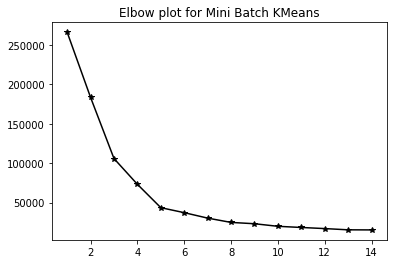

In [75]:
wscc = []
for i in range(1,15): 
    mkmeans = MiniBatchKMeans(n_clusters=i, init="k-means++",random_state=0)
    mkmeans.fit(data)
    wscc.append(mkmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for Mini Batch KMeans")

In [76]:
model_mini = MiniBatchKMeans(n_clusters=5)
model_mini.fit(data)
#
yhat_mini = model_mini.predict(data)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1 2 3 4]


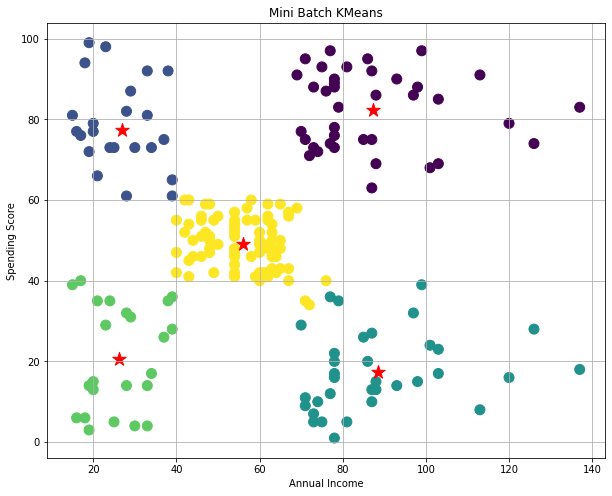

In [77]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_mini, s=100)

plt.scatter(centroids_mini[:,0], centroids_mini[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mini Batch KMeans')
plt.grid()
plt.show()

In [78]:
score_mini = metrics.silhouette_score(data,labels_mini)

print("Score of Birch = ", score_mini)

Score of Birch =  0.5537881008308215


<a id = "9"></a><br>
## 6 - Mean Shift

* Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

In [79]:
model_ms = MeanShift(bandwidth=25)
model_ms.fit(data)
#
yhat_ms = model_ms.predict(data)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift.",clusters_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_

Clusters of Mean Shift. [0 1 2 3 4]


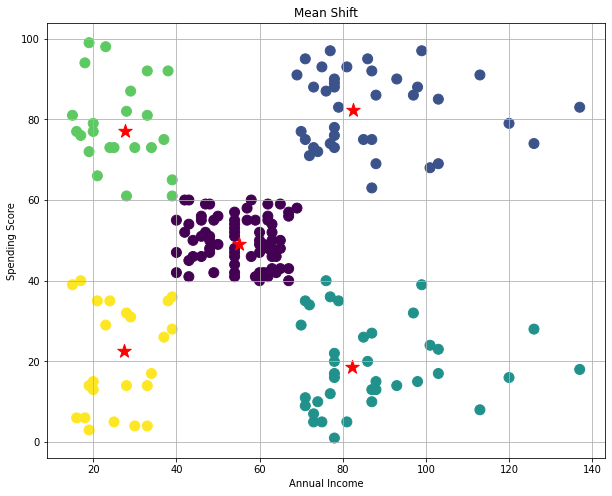

In [80]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_ms, s=100)

plt.scatter(centroids_ms[:,0], centroids_ms[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mean Shift')
plt.grid()
plt.show()

In [81]:
score_ms = metrics.silhouette_score(data,labels_ms)

print("Score of Mean Shift = ", score_ms)

Score of Mean Shift =  0.5505629344550914


<a id = "10"></a><br>
## 7 - OPTICS

* OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.
* In this case, I could not achieve a reasonable result on this dataset.

In [82]:
model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(data)
clusters_op = unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

Clusters of Mean Shift. [-1  0  1  2  3  4  5]


In [83]:
score_op = metrics.silhouette_score(data,labels_op)

print("Score of Mean Shift = ", score_op)

Score of Mean Shift =  0.12978282543522504


<a id = "11"></a><br>
## 8 - Spectral Clustering

* Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

In [84]:
model_sc = SpectralClustering(n_clusters=5)
#
yhat_sc = model_sc.fit_predict(data)
clusters_sc = unique(yhat_sc)
print("Clusters of Mean Shift.",clusters_sc)
labels_sc = model_sc.labels_

Clusters of Mean Shift. [1 2 3 4]


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:376: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


In [85]:
score_sc = metrics.silhouette_score(data,labels_sc)

print("Score of Mean Shift = ", score_sc)

Score of Mean Shift =  0.3122030605599965


<a id = "12"></a><br>
## 9 - Gaussian Mixture Model

* A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.

In [86]:
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values

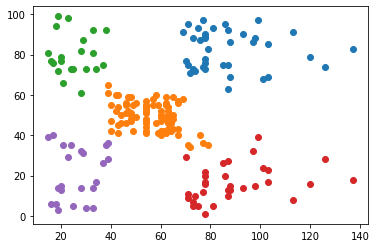

In [87]:
model_gb = GaussianMixture(n_components=5)
model_gb.fit(data_X)
#
yhat_gb = model_gb.predict(data_X)
clusters_gb = unique(yhat_gb)
# create scatter plot for samples from each cluster
for cluster in clusters_gb:
	# get row indexes for samples with this cluster
	row_ix = where(yhat_gb == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

<a id = "13"></a><br>
## 10 - Agglomerative Clustering

* Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

In [88]:
model_agg = AgglomerativeClustering(n_clusters=5)
#
yhat_agg = model_agg.fit_predict(data)
clusters_agg = unique(yhat_agg)
print("Clusters of Mini Batch KMeans.",clusters_agg)
labels_agg = model_agg.labels_

Clusters of Mini Batch KMeans. [0 1 2 3 4]


In [89]:
score_agg = metrics.silhouette_score(data,labels_agg)

print("Score of Mean Shift = ", score_agg)

Score of Mean Shift =  0.5555440617229916


<a id = "14"></a><br>
## References

* https://machinelearningmastery.com/clustering-algorithms-with-python/
* https://www.kaggle.com/code/abdulmeral/10-models-for-clustering
* https://scikit-learn.org/stable/modules/clustering.html